## Online News Popularity Analysis and  Predictions

### Awadh Ahmed

###### Goals:
* To use Decision Trees to predict the number of shares in social med 
* To use random forest to predict the number of shares in social media

In [200]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [201]:
df = pd.read_csv("Online News Popularity.csv")
df.columns = df.columns.str.replace(' ', '')
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731,12,219,0.663594,1.0,0.815385,4,2,1,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731,9,255,0.604743,1.0,0.791946,3,1,1,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731,9,211,0.575130,1.0,0.663866,3,1,1,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731,9,531,0.503788,1.0,0.665635,9,0,1,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731,13,1072,0.415646,1.0,0.540890,19,19,20,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


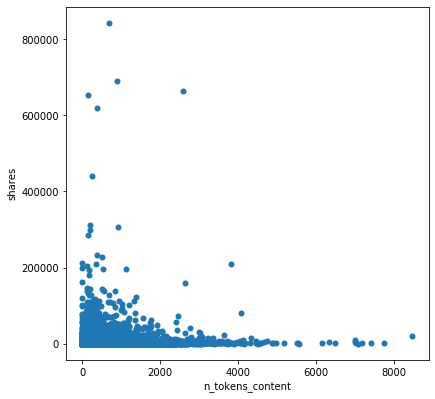

In [203]:
f, ax = plt.subplots(figsize=(6.5, 6.5))

sns.scatterplot(x="n_tokens_content", y="shares",
                sizes=(1, 8), linewidth=0,
                data=df, ax=ax)

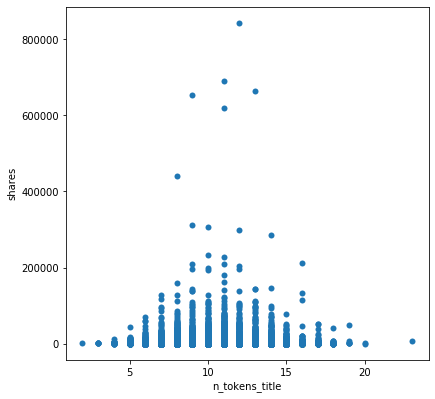

In [186]:
f, ax = plt.subplots(figsize=(6.5, 6.5))

sns.scatterplot(x="n_tokens_title", y="shares",
                sizes=(1, 8), linewidth=0,
                data=df, ax=ax)

In [195]:
#from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
#from sklearn.decomposition import TruncatedSVD

#url  & timedelta are meta data, not used for training
# Splitting the data set into predictors & predicant (shares)
# We also scale our predictors using MinMaxScaler as well

X=df[list(df.columns[2:60])]
y=df['shares']



X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)

In [199]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [198]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         1
          28       0.00      0.00      0.00         0
          41       0.00      0.00      0.00         1
          43       0.00      0.00      0.00         0
          47       0.00      0.00      0.00         0
          49       0.00      0.00      0.00         0
          51       0.00      0.00      0.00         0
          53       0.00      0.00      0.00         0
          54       0.00      0.00      0.00         1
          60       0.00      0.00      0.00         0
          63       0.00      0.00      0.00         1
          64       0.00      0.00      0.00         0
          70       0.00      0.00      0.00         1
          76       0.00      0.00      0.00         1
          80   

C:\Users\awadh\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\awadh\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [196]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
clf_rf=rf.fit(X_train,y_train)

MemoryError: could not allocate 179568640 bytes

In [ ]:
from sklearn import cross_validation,metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

print ("Accuracy= ",clf_rf.score(X_test,y_test))
y_pred=clf_rf.predict(X_test)
precision=precision_score(y_test,y_pred)
print ("Precision= ",precision)
recall=recall_score(y_test,y_pred)
print ("Recall= ",recall)
f1_scorer=f1_score(y_test,y_pred)
print ("f1_score= ",f1_scorer)

In [188]:
"""fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(df['n_tokens_title'], ax=ax1)
sns.kdeplot(df['n_tokens_content'], ax=ax1)
sns.kdeplot(df['n_unique_tokens'], ax=ax1)
sns.kdeplot(df['num_videos'], ax=ax1)
sns.kdeplot(df['num_imgs'], ax=ax1)
sns.kdeplot(df['num_hrefs'], ax=ax1)

ax2.set_title('After Standard Scaler')
sns.kdeplot(X['n_tokens_title'], ax=ax2)
sns.kdeplot(X['n_tokens_content'], ax=ax2)
sns.kdeplot(X['n_unique_tokens'], ax=ax2)
sns.kdeplot(X['num_videos'], ax=ax2)
sns.kdeplot(X['num_imgs'], ax=ax2)
sns.kdeplot(X['num_hrefs'], ax=ax2)
plt.show()"""

"fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))\n\nax1.set_title('Before Scaling')\nsns.kdeplot(df['n_tokens_title'], ax=ax1)\nsns.kdeplot(df['n_tokens_content'], ax=ax1)\nsns.kdeplot(df['n_unique_tokens'], ax=ax1)\nsns.kdeplot(df['num_videos'], ax=ax1)\nsns.kdeplot(df['num_imgs'], ax=ax1)\nsns.kdeplot(df['num_hrefs'], ax=ax1)\n\nax2.set_title('After Standard Scaler')\nsns.kdeplot(X['n_tokens_title'], ax=ax2)\nsns.kdeplot(X['n_tokens_content'], ax=ax2)\nsns.kdeplot(X['n_unique_tokens'], ax=ax2)\nsns.kdeplot(X['num_videos'], ax=ax2)\nsns.kdeplot(X['num_imgs'], ax=ax2)\nsns.kdeplot(X['num_hrefs'], ax=ax2)\nplt.show()"

In [189]:
# Plotting a heatmap of our correlation matrix
# While manual feature engineering using corrplots like these is helpful for smaller datasets
# Our current dataset has over 50 features, Dimension reduction will be a better option in this case.
"""
fig_dims = (12, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(df.corr(), ax=ax)
plt.show()"""

'\nfig_dims = (12, 8)\nfig, ax = plt.subplots(figsize=fig_dims)\nsns.heatmap(df.corr(), ax=ax)\nplt.show()'